## Introduction
This notebook is used when in-situ Groundwater Storage Anomaly (GWSA) is calculated using groundwater level time series and a storage coefficient. The final output is an area average time series of in-situ GWSA for the area under study. Some steps involve spatial analysis that is preformed in QGIS and will be explained in a separate .doc document.

This is the first part for the evaluaiton. The second part is another notebook, using the output of this notebook as input.

The data that is used in this demo is from the USGS for the Ogallala aquifer, stored in the file "WATERLEVEL_demo"

<img src="figures/waterlevel_example.png" width="450" height="100">

## 1. Read groundwater level time series

The time series are in a .csv table in the form of: SiteNo - date - depth_to_groundwater

In [28]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Groundwater level time series are in the file WATERLEVEL_demo, read into gdf dataframe
gdf = pd.DataFrame(pd.read_csv('WATERLEVEL_demo.csv', index_col='date', parse_dates=True, infer_datetime_format=True))
gdf.head()

C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '28/06/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '18/08/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '27/03/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

,SiteNo,depth_to_groundwater
date,,
2000-12-04,4.300101e+14,10.57656
2000-10-05,4.300101e+14,10.57656
2000-06-28,4.300101e+14,10.72896
2000-08-18,4.300101e+14,10.97280
2000-02-11,4.300101e+14,11.09472


There are some cases where borehole names are numbers (as is the case for most boreholes in the US). When they are read into the notebook, they usually have a scientific format. If this happens, sometimes the value is modified. To avoid that, there are some steps to consider:
 - Make sure that in the .csv file, the column containing the borehole names are in a numeric format, showing all numbers
 - We are creating a new column called "SiteNo_1", where we make sure that the whole number is completely stored. 

In [6]:
#The additional column is called "SiteNo_1"
gdf['SiteNo_1'] = [round(num) for num in gdf.SiteNo]
gdf.head()

,SiteNo,depth_to_groundwater,SiteNo_1
date,,,
2000-12-04,4.300101e+14,10.57656,430010099580601
2000-10-05,4.300101e+14,10.57656,430010099580601
2000-06-28,4.300101e+14,10.72896,430010099580601
2000-08-18,4.300101e+14,10.97280,430010099580601
2000-02-11,4.300101e+14,11.09472,430010099580601


Now we create a matrix table with all sites time series as columns. We resample this new dataframe to a monthly timescale and create a list of the column names.

In [7]:
#gdf_pivot is new matrix table/dataframe
gdf_pivot = gdf.pivot_table(index='date',columns='SiteNo_1',values='depth_to_groundwater')
gdf_pivot = gdf_pivot.resample('1m').mean()
keys_gdf = list(gdf.SiteNo_1.unique()) #list of unique values/sites of long time series
gdf_pivot.head()

SiteNo_1,7,8,9,10,11,13,14,15,18,20,...,431714099510501,431958101582101,432038101223501,432044101115201,432310101045501,432411101080701,432554101065601,432740101223501,433020101394201,433100102002101
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,19.729704,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.704088,10.661904,NaN,...,4.60248,NaN,18.86712,9.41832,6.7056,5.24256,2.16408,6.21792,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.01896,NaN,NaN,NaN,NaN,NaN,NaN,19.90344,40.78224
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Select period to be used in the evaluation

With the defined table, we proceed to select the longest period with the most time series with a complete dataset.
In this case, it is advised to glance at the complete time series and observe the longest period with most time series. It's also possible to explore different periods to explore the data with more detail

<AxesSubplot:xlabel='date'>

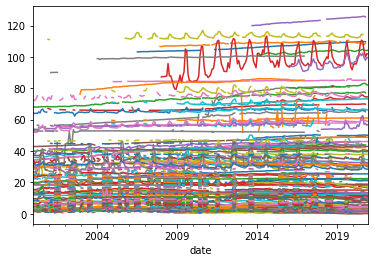

In [8]:
#First glance of the data
gdf_pivot.plot(legend=False)

In [9]:
#Select period in new dataframe "gdf_pivot_1".
gdf_pivot_1 = gdf_pivot.copy()['01-01-2002':'31-12-2016']
gdf_pivot_1.head()

C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexes\base.py:4075: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indexer = self.slice_indexer(start, stop, step)
C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


SiteNo_1,7,8,9,10,11,13,14,15,18,20,...,431714099510501,431958101582101,432038101223501,432044101115201,432310101045501,432411101080701,432554101065601,432740101223501,433020101394201,433100102002101
date,,,,,,,,,,,,,,,,,,,,,
2002-01-31,NaN,NaN,NaN,19.702272,NaN,NaN,2.767584,0.496824,NaN,NaN,...,NaN,44.71416,19.41576,10.14984,7.92480,6.21792,4.81584,7.16280,19.75104,40.23360
2002-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.81584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.65276,NaN,...,NaN,44.68368,NaN,NaN,NaN,NaN,NaN,NaN,19.65960,40.32504
2002-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.02336,44.65320,19.17192,9.78408,7.25424,5.82168,2.95656,6.82752,19.65960,40.29456
2002-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.088136,NaN,NaN,...,3.87096,44.71416,19.23288,9.78408,NaN,5.88264,2.80416,NaN,19.65960,40.29456


In the following step we remove columns that we don't want in the analysis. This can heppen in the following cases:
 - We drop all columns/boreholes with at least one missing value: Thus ensuring a complete dataset
 - We drop all columns/boreholes that fall outside of the aquifer or considered polygon for the analysis. It is ok to come back to this step after realizing that certain points are not within the polygon boundaries
 - We drop all columns/boreholes that are within the confined units of an aquifer, if possible to identify.

The number of columns/boreholes with a complete data set is  21


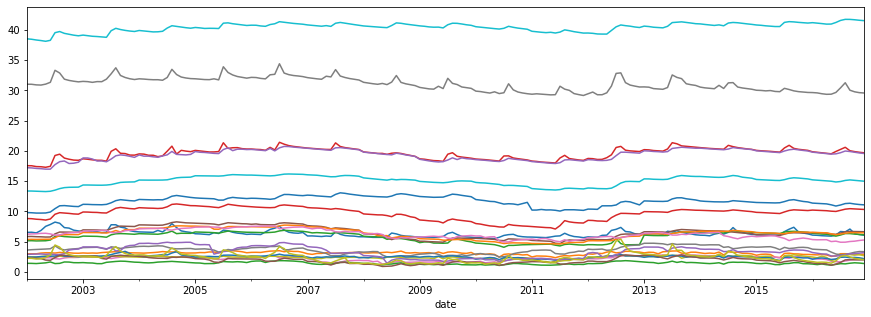

In [10]:
#In this case boreholes outside the boundaries of the aquifer/polygon and boreholes in confined areas were removed.
gdf_1 = gdf_pivot_1.copy().dropna(axis=1) # drop columns with missing values

# #TO WORK ONLY  DATA POINTS WITHIN THE SPECIFIED POLYGON
gdf_1.drop(gdf_1.loc[:,[1053602, 381119098435301, 404706101282201, 
                                  422150097402401, 430027102311801]], axis=1, inplace=True)

# #TO WORK ONLY UNCONFINED BOREHOLES
gdf_1.drop(gdf_1.loc[:,[400852101352701, 401703101394801,402757101591201,403235101395501,403516101560601,
                                  404519101170301,404620101433401,410154099394701,413156098591201]], axis=1, inplace=True)

gdf_1.plot(figsize=(15,5), legend=None)
print("The number of columns/boreholes with a complete data set is ", gdf_1.shape[1]) 

In [11]:
#Final dataset to work further in the evaluation
gdf_1

SiteNo_1,400155101521302,403954099152101,404343099272901,404513098181201,404513098181202,404618098504401,404717099460501,404949099445701,405014099591001,405137099085201,...,405315098304302,405445100074001,405632098373501,410618098113401,410943097575001,411738097264301,415559098005201,421210098402001,423148098300601,423730098560001
date,,,,,,,,,,,,,,,,,,,,,
2002-01-31,6.518295,2.977109,5.133127,17.545566,17.205198,5.833774,2.262501,3.595853,2.476353,38.504450,...,5.347569,1.409497,8.809703,2.873576,2.260534,6.218646,31.004600,2.242787,13.358892,9.796389
2002-02-28,6.545580,2.983557,5.146875,17.531280,17.174238,5.847479,2.270433,3.659940,2.467900,38.434409,...,5.371773,1.399596,8.783574,2.918950,2.250295,6.265316,30.994132,2.232987,13.352091,9.767485
2002-03-31,6.433769,2.980256,5.108595,17.394592,17.090441,5.807817,2.256257,3.694176,2.436532,38.313655,...,5.357597,1.368908,8.695846,2.932029,2.221687,6.282233,30.895757,2.129372,13.313074,9.712655
2002-04-30,6.840658,3.102813,5.128057,17.368622,17.045257,5.789778,2.282241,3.734816,2.510231,38.218974,...,5.365090,1.424467,8.648090,2.950870,2.196242,6.355870,30.865674,2.161997,13.291820,9.710455
2002-05-31,7.519975,3.154827,5.137551,17.278227,16.973296,5.749315,2.326902,3.769491,2.628851,38.100590,...,5.368511,1.487119,8.561144,2.899680,1.940560,6.370688,31.019791,2.347943,13.266273,9.728098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,6.602240,2.998839,6.325337,20.582062,19.966563,6.625467,1.791388,2.871413,2.724519,41.724170,...,6.375433,1.317326,10.356711,2.857353,1.971368,4.902055,31.248194,2.730074,15.107166,11.283794
2016-09-30,7.073462,2.931820,6.320638,20.012558,19.885050,6.676339,1.931721,3.041040,2.854960,41.716858,...,6.468669,1.427582,10.439502,2.969565,2.028850,5.014265,30.015993,2.463698,15.191435,11.335614
2016-10-31,6.338113,2.940927,6.239403,19.869666,19.759545,6.656635,2.051451,3.236927,2.760456,41.657606,...,6.473411,1.496175,10.400808,3.011522,1.985428,5.067546,29.752659,2.215552,15.118178,11.212412


## 3. Spatial analysis

Once the number of boreholes to be used in the evaluation is set, they are matched with their coordinates to proceed with the spatial analysis. 
 - Take all the names with selected columns/boreholes in new dataframe "aux2"
 - Take all the names of all boreholes in new dataframe "aux"
 - Store whether the boreholes in aux are selected or not for evaluation in new dataframe "result" as True/False values
 - Export "result" and "aux" to .xlsx and match with previously defined coordinates 

In [12]:
aux2 = pd.DataFrame(list(gdf_1)) #dataframe with names of selected columns/boreholes
aux2.columns=['all']
aux = pd.DataFrame(keys_gdf) #dataframe with names of all columns/boreholes
aux.columns=['all']
result = aux['all'].isin(aux2['all']) #dataframe with True/False values indicating whether names in aux are in selected boreholes
aux2, aux, result

(                all
 0   400155101521302
 1   403954099152101
 2   404343099272901
 3   404513098181201
 4   404513098181202
 5   404618098504401
 6   404717099460501
 7   404949099445701
 8   405014099591001
 9   405137099085201
 10  405227098165601
 11  405315098304302
 12  405445100074001
 13  405632098373501
 14  410618098113401
 15  410943097575001
 16  411738097264301
 17  415559098005201
 18  421210098402001
 19  423148098300601
 20  423730098560001,
                  all
 0    430010099580601
 1    430128099520001
 2    430133100061501
 3    430638099520801
 4    431156099521701
 ..               ...
 304          2825604
 305          2462601
 306  330458103251001
 307  332115103403301
 308  343347103345001
 
 [309 rows x 1 columns],
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 304    False
 305    False
 306    False
 307    False
 308    False
 Name: all, Length: 309, dtype: bool)

In [13]:
aux.to_excel('all_stations_demo.xlsx') #export list of all boreholes
result.to_excel('21_2002_2016_unconfined_demo.xlsx') #export list True/False values corresponding to all stations

## Go to QGIS and follow instructions on qgis_demo.doc
After following the instructions, come back with resulting table "boreholes_sy_area_demo" 

## 4. Calculate area-average GWSA
## 4.1. Bring table from previous step

In [14]:
#Read table with specific yield and area information
info_df = pd.DataFrame(pd.read_excel('boreholes_sy_area_demo.xlsx'))

In [15]:
info_df['SiteNo_1'] = [round(num) for num in info_df['SiteNo']] #Create SiteNo_1 column again to avoid changes in names
info_df

,SiteNo,DecLatVa [,DecLongVa,AquiferTyp,t/f,_mean,area_m2,SiteNo_1
0,4.039541e+14,40.664917,-99.255894,UNCONFINED,True,0.168974,2.478745e+09,403954099152101
1,4.045131e+14,40.756250,-98.305050,UNCONFINED,True,0.158464,2.330427e+09,404513098181201
2,4.045131e+14,40.756250,-98.305083,UNCONFINED,True,0.176290,1.404692e+09,404513098181202
3,4.001551e+14,40.028667,-101.871222,UNCONFINED,True,0.159683,1.445858e+10,400155101521302
4,4.047171e+14,40.787611,-99.768036,UNCONFINED,True,0.169776,2.040953e+09,404717099460501
5,4.046181e+14,40.771680,-98.845912,UNCONFINED,True,0.176705,2.631239e+09,404618098504401
6,4.043431e+14,40.728417,-99.457925,UNCONFINED,True,0.164973,2.012385e+09,404343099272901
7,4.053151e+14,40.887972,-98.511906,UNCONFINED,True,0.154825,7.270347e+08,405315098304302
8,4.052271e+14,40.874167,-98.282222,UNCONFINED,True,0.177402,7.281947e+08,405227098165601
9,4.050141e+14,40.837250,-99.986189,UNCONFINED,True,0.157330,3.358156e+09,405014099591001


## 4.2. Generate table with: borehole names - sy - area - sy * area 

In [16]:
#Average sy and total area per polygon in a single dataframe "df"
sy = info_df.groupby('SiteNo_1', as_index=False)['_mean'].mean() #specific yield
area = info_df.groupby('SiteNo_1', as_index=False)['area_m2'].sum() #area
df = pd.merge(sy, area, on="SiteNo_1")
df['sy*area'] = df._mean * (df.area_m2) #area in m2
df.set_index('SiteNo_1', inplace=True) #Set SiteNo_1 as index
df

,_mean,area_m2,sy*area
SiteNo_1,,,
400155101521302,0.159683,1.445858e+10,2.308793e+09
403954099152101,0.168974,2.478745e+09,4.188445e+08
404343099272901,0.164973,2.012385e+09,3.319884e+08
404513098181201,0.158464,2.330427e+09,3.692886e+08
404513098181202,0.176290,1.404692e+09,2.476328e+08
404618098504401,0.176705,2.631239e+09,4.649527e+08
404717099460501,0.169776,2.040953e+09,3.465059e+08
404949099445701,0.163659,3.096461e+09,5.067653e+08
405014099591001,0.157330,3.358156e+09,5.283385e+08


## 4.3. Read aquifer types per borehole (when available): Confined/Unconfined

In this case the file "all_coordinates_demo" has, in addition to the borehole coordinates, information about whether a borehole is in a confined or unconfined state.

Skip if no data related to confined/unconfined conditions is available

In [17]:
#read aquifer types from "all_coordinates_demo"
siteno_info = pd.DataFrame(pd.read_csv('all_coordinates_demo.csv').iloc[:,:])
siteno_info['SiteNo_1'] = [round(num) for num in siteno_info.SiteNo]
siteno_info.set_index('SiteNo_1', inplace=True)
siteno_info

,SiteNo,DecLatVa [deg],DecLongVa [deg],AquiferType
SiteNo_1,,,,
7,7.000000e+00,40.989937,-98.746700,UNCONFINED
8,8.000000e+00,41.665539,-101.438019,UNCONFINED
9,9.000000e+00,41.236328,-101.509558,UNCONFINED
10,1.000000e+01,41.392242,-100.877769,UNCONFINED
11,1.100000e+01,41.859840,-98.210400,UNCONFINED
...,...,...,...,...
432411101080701,4.324111e+14,43.403335,-101.137369,CONFINED
432554101065601,4.325541e+14,43.432501,-101.117924,CONFINED
432740101223501,4.327401e+14,43.462222,-101.375702,CONFINED


## 4.4. Arrange groundwater level time series data from step 2 into one long table with:
## SiteNo_1 - date - water_level

In [18]:
#dataframe with siteID, date and water level
gdf_melt = gdf_1['01-01-2002':'31-12-2016'].copy() #dataframe from step 2
gdf_melt = gdf_melt.unstack().reset_index(name='water_level')
gdf_melt

C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexes\base.py:4075: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indexer = self.slice_indexer(start, stop, step)
C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


,SiteNo_1,date,water_level
0,400155101521302,2002-01-31,6.518295
1,400155101521302,2002-02-28,6.545580
2,400155101521302,2002-03-31,6.433769
3,400155101521302,2002-04-30,6.840658
4,400155101521302,2002-05-31,7.519975
...,...,...,...
3775,423730098560001,2016-08-31,11.283794
3776,423730098560001,2016-09-30,11.335614
3777,423730098560001,2016-10-31,11.212412
3778,423730098560001,2016-11-30,11.126216


## 4.5. Add to "gdf_melt" site information: sy * area - confined/unconfined - mean_waterlevel

This info is used to calculate GWSA:
    GWSA = Sum ((mean_waterlevel - water_level) * (sy * area))

In [19]:
long_df_melt = gdf_melt.copy()
long_df_melt['sy*area'] = ''
long_df_melt['confined/unconfined'] = ''
long_df_melt['mean_waterlevel'] = ''
long_df_melt.set_index('SiteNo_1', inplace=True)
long_df_melt

,date,water_level,sy*area,confined/unconfined,mean_waterlevel
SiteNo_1,,,,,
400155101521302,2002-01-31,6.518295,,,
400155101521302,2002-02-28,6.545580,,,
400155101521302,2002-03-31,6.433769,,,
400155101521302,2002-04-30,6.840658,,,
400155101521302,2002-05-31,7.519975,,,
...,...,...,...,...,...
423730098560001,2016-08-31,11.283794,,,
423730098560001,2016-09-30,11.335614,,,
423730098560001,2016-10-31,11.212412,,,


In [20]:
#Assign sy*area and confined/unconfined values to dataframe per site using mapping
long_df_melt['sy*area'] = long_df_melt.index.map(df['sy*area'])
long_df_melt['confined/unconfined'] = long_df_melt.index.map(siteno_info['AquiferType'])
long_df_melt

,date,water_level,sy*area,confined/unconfined,mean_waterlevel
SiteNo_1,,,,,
400155101521302,2002-01-31,6.518295,2.308793e+09,UNCONFINED,
400155101521302,2002-02-28,6.545580,2.308793e+09,UNCONFINED,
400155101521302,2002-03-31,6.433769,2.308793e+09,UNCONFINED,
400155101521302,2002-04-30,6.840658,2.308793e+09,UNCONFINED,
400155101521302,2002-05-31,7.519975,2.308793e+09,UNCONFINED,
...,...,...,...,...,...
423730098560001,2016-08-31,11.283794,5.906996e+08,UNCONFINED,
423730098560001,2016-09-30,11.335614,5.906996e+08,UNCONFINED,
423730098560001,2016-10-31,11.212412,5.906996e+08,UNCONFINED,


**Identify in this previous step if there are any CONFINED sites and remove them from the analysis in step 2. Do the analysis again without those broeholes**

In [21]:
#OBTAIN MEAN WATER LEVEL PER SITE TO THEN SUBTRACT FROM WATER LEVELS - ANOMALY 
waterlevel_means = long_df_melt.reset_index().groupby('SiteNo_1', as_index=False)['water_level'].mean()
waterlevel_means.set_index('SiteNo_1', inplace=True)
waterlevel_means

,water_level
SiteNo_1,
400155101521302,6.340397
403954099152101,3.081107
404343099272901,5.808741
404513098181201,19.599081
404513098181202,19.342167
404618098504401,6.517206
404717099460501,2.200864
404949099445701,3.638163
405014099591001,2.413753


In [22]:
#ASSIGN MEAN WATER LEVEL TO EACH SITE AND TIME SERIES
long_df_melt['mean_waterlevel'] = long_df_melt.index.map(waterlevel_means['water_level'])
long_df_melt

,date,water_level,sy*area,confined/unconfined,mean_waterlevel
SiteNo_1,,,,,
400155101521302,2002-01-31,6.518295,2.308793e+09,UNCONFINED,6.340397
400155101521302,2002-02-28,6.545580,2.308793e+09,UNCONFINED,6.340397
400155101521302,2002-03-31,6.433769,2.308793e+09,UNCONFINED,6.340397
400155101521302,2002-04-30,6.840658,2.308793e+09,UNCONFINED,6.340397
400155101521302,2002-05-31,7.519975,2.308793e+09,UNCONFINED,6.340397
...,...,...,...,...,...
423730098560001,2016-08-31,11.283794,5.906996e+08,UNCONFINED,11.672108
423730098560001,2016-09-30,11.335614,5.906996e+08,UNCONFINED,11.672108
423730098560001,2016-10-31,11.212412,5.906996e+08,UNCONFINED,11.672108


In [23]:
#Calculate montlhy GWSA[mm] per site 
longdf_noindex = long_df_melt.copy()
longdf_noindex.reset_index(inplace=True)

area_aquifer = 83085216803.248 #area of aquifer or polygon within aquifer in m2 

longdf_noindex['meandiff_gwl'] = longdf_noindex['mean_waterlevel'] - longdf_noindex['water_level']
longdf_noindex['gws_m3'] = longdf_noindex['meandiff_gwl'] * longdf_noindex['sy*area']
longdf_noindex['gws_mm'] = (longdf_noindex['gws_m3']/area_aquifer)*1000
        
longdf_noindex
        

,SiteNo_1,date,water_level,sy*area,confined/unconfined,mean_waterlevel,meandiff_gwl,gws_m3,gws_mm
0,400155101521302,2002-01-31,6.518295,2.308793e+09,UNCONFINED,6.340397,-0.177898,-4.107300e+08,-4.943479
1,400155101521302,2002-02-28,6.545580,2.308793e+09,UNCONFINED,6.340397,-0.205183,-4.737243e+08,-5.701668
2,400155101521302,2002-03-31,6.433769,2.308793e+09,UNCONFINED,6.340397,-0.093372,-2.155763e+08,-2.594641
3,400155101521302,2002-04-30,6.840658,2.308793e+09,UNCONFINED,6.340397,-0.500261,-1.154998e+09,-13.901367
4,400155101521302,2002-05-31,7.519975,2.308793e+09,UNCONFINED,6.340397,-1.179577,-2.723400e+09,-32.778395
...,...,...,...,...,...,...,...,...,...
3775,423730098560001,2016-08-31,11.283794,5.906996e+08,UNCONFINED,11.672108,0.388313,2.293766e+08,2.760739
3776,423730098560001,2016-09-30,11.335614,5.906996e+08,UNCONFINED,11.672108,0.336494,1.987670e+08,2.392327
3777,423730098560001,2016-10-31,11.212412,5.906996e+08,UNCONFINED,11.672108,0.459696,2.715420e+08,3.268235
3778,423730098560001,2016-11-30,11.126216,5.906996e+08,UNCONFINED,11.672108,0.545892,3.224581e+08,3.881052


## 4.6. Export "longdf_noindex" to excel. This will be the in-situ input for the G3P analysis

Here, we will calculate the area-average GWSA, which is basically a sumation of all januaries, all februaries, etc in all sites.

In [24]:
longdf_noindex.to_excel('longdf_alldata_2002_2016_demo.xlsx')

In [25]:
#Read the data
final_df = pd.read_excel('longdf_alldata_2002_2016_demo.xlsx')
final_df

,Unnamed: 0,SiteNo_1,date,water_level,sy*area,confined/unconfined,mean_waterlevel,meandiff_gwl,gws_m3,gws_mm
0,0,400155101521302,2002-01-31,6.518295,2.308793e+09,UNCONFINED,6.340397,-0.177898,-4.107300e+08,-4.943479
1,1,400155101521302,2002-02-28,6.545580,2.308793e+09,UNCONFINED,6.340397,-0.205183,-4.737243e+08,-5.701668
2,2,400155101521302,2002-03-31,6.433769,2.308793e+09,UNCONFINED,6.340397,-0.093372,-2.155763e+08,-2.594641
3,3,400155101521302,2002-04-30,6.840658,2.308793e+09,UNCONFINED,6.340397,-0.500261,-1.154998e+09,-13.901367
4,4,400155101521302,2002-05-31,7.519975,2.308793e+09,UNCONFINED,6.340397,-1.179577,-2.723400e+09,-32.778395
...,...,...,...,...,...,...,...,...,...,...
3775,3775,423730098560001,2016-08-31,11.283794,5.906996e+08,UNCONFINED,11.672108,0.388313,2.293766e+08,2.760739
3776,3776,423730098560001,2016-09-30,11.335614,5.906996e+08,UNCONFINED,11.672108,0.336494,1.987670e+08,2.392327
3777,3777,423730098560001,2016-10-31,11.212412,5.906996e+08,UNCONFINED,11.672108,0.459696,2.715420e+08,3.268235
3778,3778,423730098560001,2016-11-30,11.126216,5.906996e+08,UNCONFINED,11.672108,0.545892,3.224581e+08,3.881052


In [26]:
#CALCULATION OF AREA-AVERAGE GWSA
final_df1 = final_df[['date', 'gws_mm']].groupby('date', as_index=False).sum()
final_df1.set_index('date', inplace=True)
final_df1

,gws_mm
date,
2002-01-31,57.841144
2002-02-28,57.423253
2002-03-31,66.747575
2002-04-30,53.166157
2002-05-31,30.795582
...,...
2016-08-31,-10.254054
2016-09-30,-9.659494
2016-10-31,17.172120


C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexes\base.py:4075: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indexer = self.slice_indexer(start, stop, step)
C:\Users\Alexandra\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Text(0, 0.5, 'in-situ GWSA [mm]')

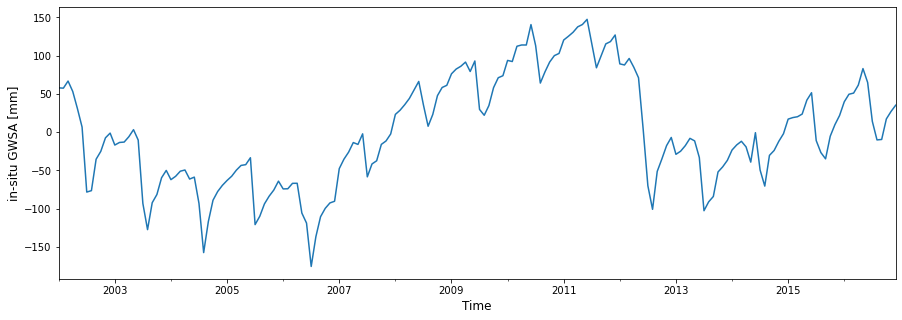

In [27]:
f,ax=plt.subplots(figsize=(15,5))
some_df = final_df1['01-01-2002':'31-12-2016']
some_df.gws_mm.plot()
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('in-situ GWSA [mm]', fontsize = 12)